[*********************100%%**********************]  1 of 1 completed


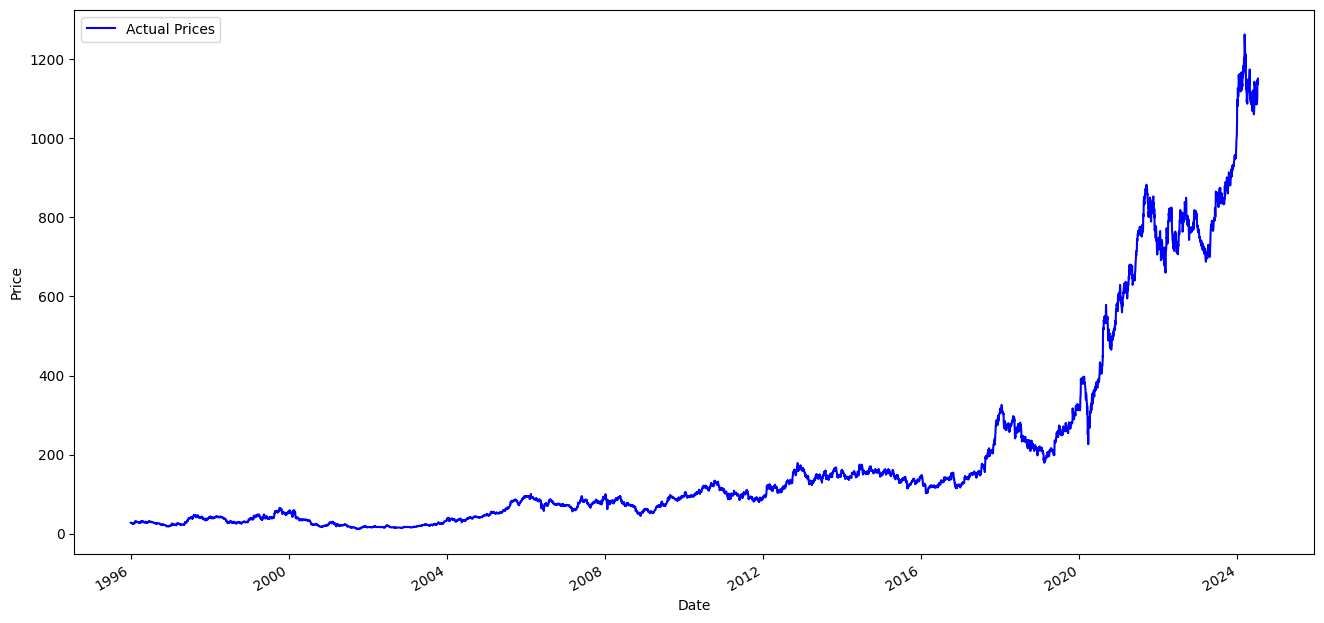

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'TATACONSUM.NS'  
df = yf.download(ticker)
df
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color='blue', label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [15]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

[array([0.01275916, 0.01239107, 0.01255111, 0.0125111 , 0.01241908,
       0.01201498, 0.01160688, 0.01162288, 0.01181493, 0.01203098,
       0.01171491, 0.01163889, 0.01159888, 0.01148285, 0.01135482,
       0.01117477, 0.01015052, 0.01026254, 0.01043459, 0.01043459])]
[0.011042738317300637]

[array([0.01275916, 0.01239107, 0.01255111, 0.0125111 , 0.01241908,
       0.01201498, 0.01160688, 0.01162288, 0.01181493, 0.01203098,
       0.01171491, 0.01163889, 0.01159888, 0.01148285, 0.01135482,
       0.01117477, 0.01015052, 0.01026254, 0.01043459, 0.01043459]), array([0.01239107, 0.01255111, 0.0125111 , 0.01241908, 0.01201498,
       0.01160688, 0.01162288, 0.01181493, 0.01203098, 0.01171491,
       0.01163889, 0.01159888, 0.01148285, 0.01135482, 0.01117477,
       0.01015052, 0.01026254, 0.01043459, 0.01043459, 0.01104274])]
[0.011042738317300637, 0.01115476560738049]

Epoch 1/10
679/679 [==============================] - 23s 23ms/step - loss: 1.8847e-04
Epoch 2/10
679/679 [============

In [16]:
predictions = model.predict(x_train)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_train,predictions)
r2

212/212 [==============================] - 4s 10ms/step


0.9992487932063133

In [17]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

12/12 [==============================] - 2s 14ms/step


0.9924570563004024

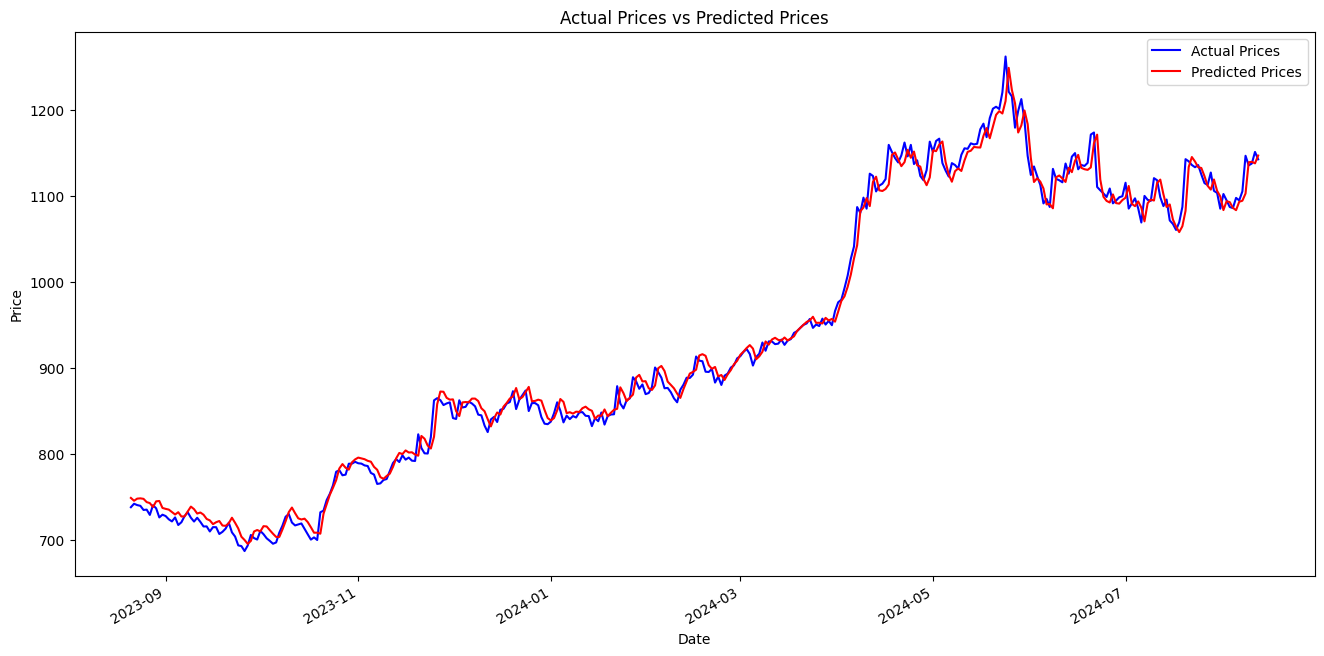

In [18]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [21]:
import joblib


model_file_path = '50.joblib'
scaler_file_path = 'scaler50.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 50.joblib
Scaler saved to scaler50.joblib
